In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data
data = pd.read_csv("ukraine-damages.csv", delimiter = "|")
data

,damage_id,iso3,country,gid_1,oblast,rayon,type_of_infrastructure,if_other_what,date_of_event,source_name,source_date,source_link,additional_sources,extent_of_damage,_internal_filter_date,_weights,access_subindicator,pcode
0,D0011,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-25,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-25,0.7,['7.2'],UA44
1,D0012,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Partially damaged,2022-03-26,0.7,['7.2'],UA44
2,D0015,UKR,Ukraine,['UKR.14_1'],Lvivska,NaN,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Unknown,2022-03-26,1.0,['7.2'],UA46
3,D0016,UKR,Ukraine,['UKR.14_1'],Lvivska,NaN,Aircraft repair plant,Aircraft repair plan,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-26,1.0,['7.2'],UA46
4,D0017,UKR,Ukraine,['UKR.12_1'],Kyivska,NaN,Bridge,NaN,2022-03-22,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-22,1.0,['9.2'],UA32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24264,D9995,UKR,Ukraine,['UKR.9_1'],Khersonska,Khersonskyi,"Health facility (hospital, health clinic)",NaN,2023-04-03,MagnoliaTV,2023-04-04,https://magnolia-tv.com/news/88335-khersonska-...,NaN,Partially damaged,2023-04-03,0.7,['7.2'],UA65
24265,D9996,UKR,Ukraine,['UKR.17_1'],Odeska,Odeskyi,Industrial/Business/Enterprise facilities,NaN,2023-04-04,Baltanews,2023-04-04,https://baltanews.city/articles/276787/vorog-a...,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA51
24266,D9997,UKR,Ukraine,['UKR.6_1'],Donetska,Bakhmutskyi,Industrial/Business/Enterprise facilities,the mine,2023-04-04,Ukrainska Pravda,2023-04-04,https://www.pravda.com.ua/news/2023/04/4/7396355/,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA14
24267,D9998,UKR,Ukraine,['UKR.6_1'],Donetska,Bakhmutskyi,Government facilities,NaN,2023-04-04,Ukrainska Pravda,2023-04-04,https://www.pravda.com.ua/news/2023/04/4/7396355/,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA14


In [3]:
#Oblast is the region
#Rayon is the district within the region
#I think it makes the most sense to model at the Rayon level as these are smaller than Oblasts
#how many rayon are NaN?
a = data['rayon'].isna().sum()
b = data['rayon'].value_counts()
a,b


(np.int64(8720),
 rayon
 Nikopolskyi     2474
 Kramatorskyi    2274
 Kharkivskyi     1308
 Khersonskyi     1187
 Pokrovskyi       733
                 ... 
 Khmilnytskyi       1
 Yaltynskyi         1
 Zhmerynskyi        1
 Sambirskyi         1
 Kovelskyi          1
 Name: count, Length: 113, dtype: int64)

In [4]:
missing_r = (8720/24269)*100
missing_r

35.93061106761712

Having 35% of the rayons missing kinda stinks...

Let evaluate the oblasts for missingness

In [5]:
#how many oblasts are NaN?
c = data['oblast'].isna().sum()
d = data['oblast'].value_counts()
c,d

(np.int64(8),
 oblast
 Donetska                         6095
 Dnipropetrovska                  4053
 Kharkivska                       3393
 Khersonska                       2305
 Mykolaivska                      2110
 Sumska                           1540
 Zaporizka                         803
 Odeska                            671
 Kyivska                           645
 Luhanska                          588
 Chernihivska                      516
 Kyiv                              498
 Zhytomyrska                       204
 Khmelnytska                       177
 Poltavska                         148
 Cherkaska                         133
 Lvivska                           128
 Kirovohradska                      67
 Vinnytska                          53
 Ternopilska                        37
 Rivnenska                          22
 Ivano-Frankivska                   19
 Volynska                           16
 Autonomous Republic of Crimea      16
 Zakarpatska                        12
 Ch

In [6]:
missing_o = (8/24269)*100
missing_o

0.03296386336478636

Having only .03% missing is much more tolerable

I'll continue the code using the Oblasts vs the Rayons but this can be revised later, maybe we can fill NaN vlaues with the corresponding Oblast for missing 
Rayons?

Group met on 11/11 proposed to change NaN values to 'Unknown'

# Old Code:
```
#Trim data to only include Oblasts that are not missing
#Expecting 24261 rows
trimmed_data = data[data['oblast'].notna()]
trimmed_data
```

In [35]:
#Convert missing values to 'Unknown'
data['rayon'] = data['rayon'].fillna('Missing')
data['oblast'] = data['oblast'].fillna('Unknown')
data

,damage_id,iso3,country,gid_1,oblast,rayon,type_of_infrastructure,if_other_what,date_of_event,source_name,source_date,source_link,additional_sources,extent_of_damage,_internal_filter_date,_weights,access_subindicator,pcode
0,D0011,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-25,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-25,0.7,['7.2'],UA44
1,D0012,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Partially damaged,2022-03-26,0.7,['7.2'],UA44
2,D0015,UKR,Ukraine,['UKR.14_1'],Lvivska,Missing,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Unknown,2022-03-26,1.0,['7.2'],UA46
3,D0016,UKR,Ukraine,['UKR.14_1'],Lvivska,Missing,Aircraft repair plant,Aircraft repair plan,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-26,1.0,['7.2'],UA46
4,D0017,UKR,Ukraine,['UKR.12_1'],Kyivska,Missing,Bridge,NaN,2022-03-22,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-22,1.0,['9.2'],UA32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24264,D9995,UKR,Ukraine,['UKR.9_1'],Khersonska,Khersonskyi,"Health facility (hospital, health clinic)",NaN,2023-04-03,MagnoliaTV,2023-04-04,https://magnolia-tv.com/news/88335-khersonska-...,NaN,Partially damaged,2023-04-03,0.7,['7.2'],UA65
24265,D9996,UKR,Ukraine,['UKR.17_1'],Odeska,Odeskyi,Industrial/Business/Enterprise facilities,NaN,2023-04-04,Baltanews,2023-04-04,https://baltanews.city/articles/276787/vorog-a...,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA51
24266,D9997,UKR,Ukraine,['UKR.6_1'],Donetska,Bakhmutskyi,Industrial/Business/Enterprise facilities,the mine,2023-04-04,Ukrainska Pravda,2023-04-04,https://www.pravda.com.ua/news/2023/04/4/7396355/,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA14
24267,D9998,UKR,Ukraine,['UKR.6_1'],Donetska,Bakhmutskyi,Government facilities,NaN,2023-04-04,Ukrainska Pravda,2023-04-04,https://www.pravda.com.ua/news/2023/04/4/7396355/,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA14


In [36]:
oblasts = data[['oblast']].copy()
oblasts.reset_index(drop=True, inplace=True)
oblasts

,oblast
0,Luhanska
1,Luhanska
2,Lvivska
3,Lvivska
4,Kyivska
...,...
24264,Khersonska
24265,Odeska
24266,Donetska
24267,Donetska


In [37]:
#get unique oblasts for the States
states = set(oblasts.iloc[0])
for i in range(1, len(oblasts)):
    transition_i = set(oblasts.iloc[i])
    states = states.union(transition_i)
states = list(states)
states

['Kharkivska',
 'Khmelnytska',
 'Sevastopol',
 'Volynska',
 'Kyivska',
 'Kyiv',
 'Autonomous Republic of Crimea',
 'Unknown',
 'Ivano-Frankivska',
 'Poltavska',
 'Cherkaska',
 'Vinnytska',
 'Mykolaivska',
 'Lvivska',
 'Khersonska',
 'Zakarpatska',
 'Zaporizka',
 'Odeska',
 'Ternopilska',
 'Donetska',
 'Chernivetska',
 'Chernihivska',
 'Luhanska',
 'Sumska',
 'Rivnenska',
 'Zhytomyrska',
 'Kirovohradska',
 'Dnipropetrovska']

In [38]:
#Now we need to modify the oblast df so the next oblast is in a new column "next_oblast"
oblasts['Current_State'] = oblasts['oblast']
oblasts['Next_State'] = oblasts['oblast'].shift(-1)
oblast_transition = oblasts.dropna(subset=['Next_State'])
oblast_transition

,oblast,Current_State,Next_State
0,Luhanska,Luhanska,Luhanska
1,Luhanska,Luhanska,Lvivska
2,Lvivska,Lvivska,Lvivska
3,Lvivska,Lvivska,Kyivska
4,Kyivska,Kyivska,Chernihivska
...,...,...,...
24263,Khersonska,Khersonska,Khersonska
24264,Khersonska,Khersonska,Odeska
24265,Odeska,Odeska,Donetska
24266,Donetska,Donetska,Donetska


In [39]:
#Setting up the transition matrix
#S is the number of states
#tr_counts is the transition count matrix filled with zeros
S = len(states)
tr_counts = np.zeros( (S, S) )

In [40]:
#Fill the transition count matrix
for i in range(len(oblast_transition)):
    current_state = oblast_transition.iloc[i]['Current_State']
    next_state = oblast_transition.iloc[i]['Next_State']
    
    current_index = states.index(current_state)
    next_index = states.index(next_state)
    
    tr_counts[current_index, next_index] += 1
print("Transition Counts Matrix:\n", tr_counts)

Transition Counts Matrix:
 [[1.949e+03 1.400e+01 1.000e+00 0.000e+00 3.700e+01 3.100e+01 4.000e+00
  2.000e+00 4.000e+00 1.400e+01 1.400e+01 2.000e+00 4.000e+01 8.000e+00
  2.120e+02 0.000e+00 7.600e+01 6.900e+01 2.000e+00 3.900e+02 1.000e+00
  3.600e+01 4.900e+01 1.340e+02 0.000e+00 2.200e+01 5.000e+00 2.770e+02]
 [1.600e+01 1.100e+02 0.000e+00 1.000e+00 4.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 1.000e+00 2.000e+00 0.000e+00 2.000e+00 0.000e+00
  2.000e+00 0.000e+00 2.000e+00 1.000e+00 0.000e+00 1.000e+01 0.000e+00
  1.000e+00 2.000e+00 1.200e+01 0.000e+00 1.000e+00 1.000e+00 8.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.000e+00]
 [0.000e+00 1.000e+00 0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.

In [41]:
#Now we need to normalize the transition counts to get probabilities
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(sums)

State proportions: 

[[3.393e+03 1.770e+02 5.000e+00 1.600e+01 6.450e+02 4.980e+02 1.600e+01
  8.000e+00 1.900e+01 1.480e+02 1.330e+02 5.300e+01 2.110e+03 1.280e+02
  2.305e+03 1.200e+01 8.030e+02 6.710e+02 3.700e+01 6.095e+03 7.000e+00
  5.160e+02 5.870e+02 1.540e+03 2.200e+01 2.040e+02 6.700e+01 4.053e+03]]


In [42]:
#Continue to normalize by dividing each element by the sum of its column make sure we dont divide by zero
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)

Transition Proportions:

                               Kharkivska  Khmelnytska  Sevastopol  Volynska  \
Kharkivska                           0.57         0.08         0.2      0.00   
Khmelnytska                          0.00         0.62         0.0      0.06   
Sevastopol                           0.00         0.00         0.0      0.00   
Volynska                             0.00         0.01         0.0      0.25   
Kyivska                              0.01         0.01         0.0      0.06   
Kyiv                                 0.01         0.02         0.0      0.06   
Autonomous Republic of Crimea        0.00         0.00         0.2      0.00   
Unknown                              0.00         0.00         0.0      0.00   
Ivano-Frankivska                     0.00         0.01         0.0      0.00   
Poltavska                            0.00         0.01         0.0      0.00   
Cherkaska                            0.00         0.00         0.0      0.00   
Vinnytska      

In [43]:
oblast_tr_df = tr_df

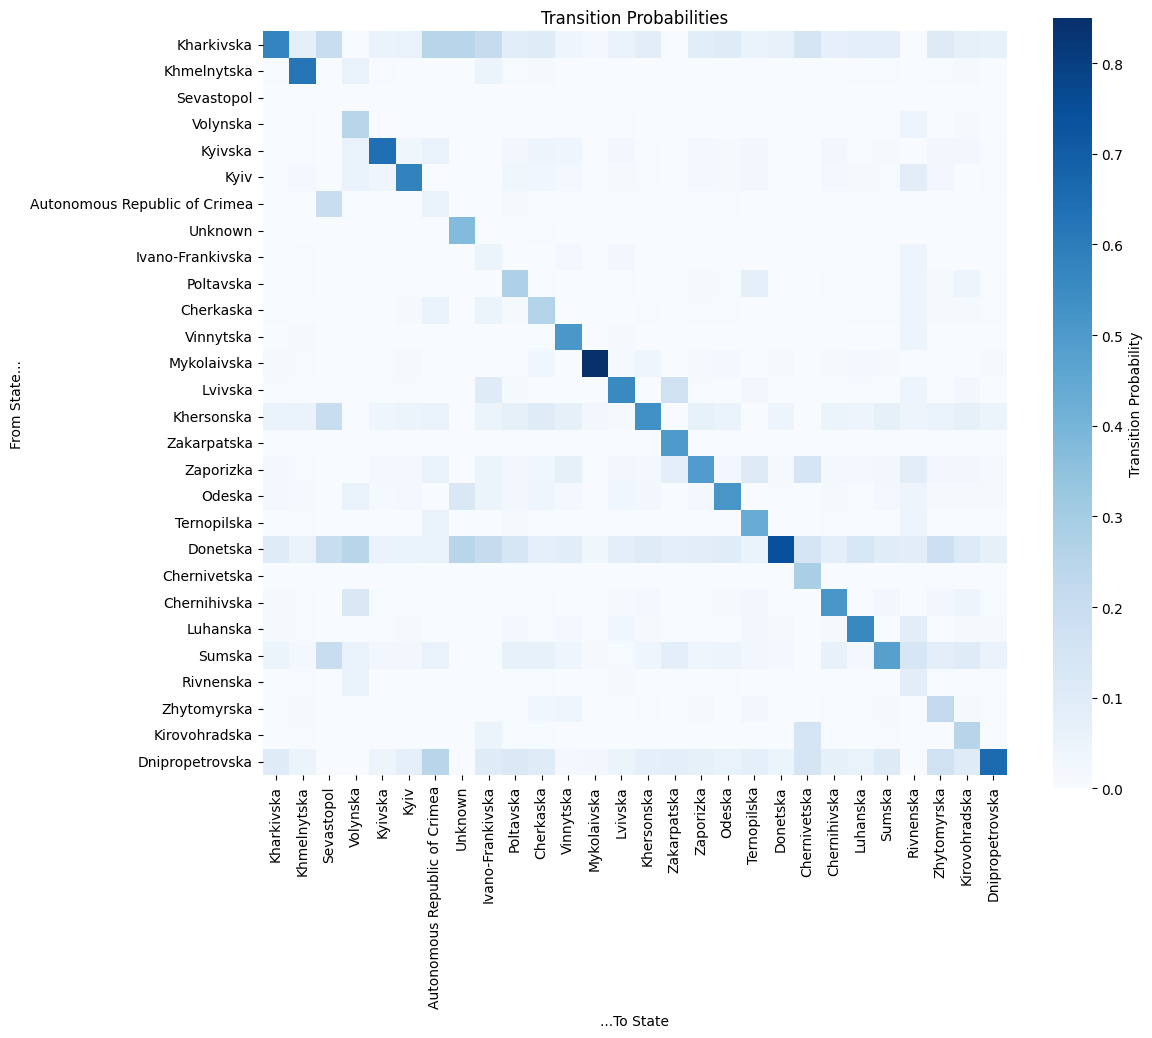

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Based on this the most likely state to transition to is the Oblast youre already in.

# Rayon Markov Chain

In [44]:
rayon = data[['rayon']].copy()
rayon.reset_index(drop=True, inplace=True)
rayon

,rayon
0,Siverskodonetskyi
1,Siverskodonetskyi
2,Missing
3,Missing
4,Missing
...,...
24264,Khersonskyi
24265,Odeskyi
24266,Bakhmutskyi
24267,Bakhmutskyi


In [45]:
#get unique rayons for the States space
ray_states = set(rayon.iloc[0])
for i in range(1, len(rayon)):
    transition_i = set(rayon.iloc[i])
    ray_states = ray_states.union(transition_i)
ray_states = list(ray_states)
ray_states

['Prylutskyi',
 'Haisynskyi',
 'Koriukivskyi',
 'Kerchenskyi',
 'Volnovaskyi',
 'Lutskyi',
 'Lubenskyi',
 'Khmilnytskyi',
 'Obukhivskyi',
 'Okhtyrskyi',
 'Ivano-Frankivskyi',
 'Nikopolskyi',
 'Mykolaivskyi',
 'Vinnytskyi',
 'Oleksandriiskyi',
 'Zvenyhorodskyi',
 'Romenskyi',
 'Missing',
 'Donetskyi',
 'Brovarskyi',
 'Nizhynskyi',
 'Buchanskyi',
 'Ternopilskyi',
 'Sevastopol',
 'Berdianskyi',
 'Kamianskyi',
 'Synelnykivskyi',
 'Beryslavskyi',
 'Podilskyi',
 'Starobilskyi',
 'Kupianskyi',
 'Sheptytskyi',
 'Drohobytskyi',
 'Chortkivskyi',
 'Rivnenskyi',
 'Korostenskyi',
 'Kolomyiskyi',
 'Khustskyi',
 'Bolhradskyi',
 'Dzhankoiskyi',
 'Kovelskyi',
 'Pervomaiskyi',
 'Yaltynskyi',
 'Bashtanskyi',
 'Khmelnytskyi',
 'Odeskyi',
 'Novhorod-Siverskyi',
 'Pokrovskyi',
 'Simferopolskyi',
 'Siverskodonetskyi',
 'Lvivskyi',
 'Konotopskyi',
 'Chernivetskyi',
 'Kaluskyi',
 'Kramatorskyi',
 'Feodosiiskyi',
 'Bilhorod-Dnistrovskyi',
 'Chernihivskyi',
 'Umanskyi',
 'Berdychivskyi',
 'Shchastynskyi',
 'Dnis

In [46]:
#Now we need to modify the rayon df so the next rayon is in a new column "next_state"
rayon['Current_State'] = rayon['rayon']
rayon['Next_State'] = rayon['rayon'].shift(-1)
rayon_transition = rayon.dropna(subset=['Next_State'])
rayon_transition

,rayon,Current_State,Next_State
0,Siverskodonetskyi,Siverskodonetskyi,Siverskodonetskyi
1,Siverskodonetskyi,Siverskodonetskyi,Missing
2,Missing,Missing,Missing
3,Missing,Missing,Missing
4,Missing,Missing,Missing
...,...,...,...
24263,Beryslavskyi,Beryslavskyi,Khersonskyi
24264,Khersonskyi,Khersonskyi,Odeskyi
24265,Odeskyi,Odeskyi,Bakhmutskyi
24266,Bakhmutskyi,Bakhmutskyi,Bakhmutskyi


In [47]:
#Setting up the transition matrix
#S is the number of states
#tr_counts is the transition count matrix filled with zeros
S = len(ray_states)
tr_counts = np.zeros( (S, S) )

In [48]:
#Fill the transition count matrix
for i in range(len(rayon_transition)):
    current_state = rayon_transition.iloc[i]['Current_State']
    next_state = rayon_transition.iloc[i]['Next_State']
    
    current_index = ray_states.index(current_state)
    next_index = ray_states.index(next_state)
    
    tr_counts[current_index, next_index] += 1
print("Transition Counts Matrix:\n", tr_counts)

Transition Counts Matrix:
 [[ 8.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 13. ...  1.  1.  0.]
 ...
 [ 0.  0.  0. ... 98.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0. 24.]]


In [49]:
#Now we need to normalize the transition counts to get probabilities
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(sums)

State proportions: 

[[2.000e+01 1.000e+00 4.400e+01 4.000e+00 7.100e+01 1.400e+01 4.000e+00
  1.000e+00 2.000e+01 9.700e+01 7.000e+00 2.474e+03 3.080e+02 1.300e+01
  7.000e+00 1.100e+01 2.600e+01 8.720e+03 3.800e+01 3.100e+01 2.100e+01
  3.600e+01 3.000e+01 5.000e+00 1.300e+01 3.400e+01 3.290e+02 2.780e+02
  3.000e+00 2.000e+00 4.730e+02 1.000e+00 6.000e+00 4.000e+00 2.000e+00
  3.000e+00 2.000e+00 1.000e+00 4.000e+00 2.000e+00 1.000e+00 6.000e+00
  1.000e+00 5.000e+01 7.300e+01 4.460e+02 1.340e+02 7.330e+02 2.000e+00
  1.600e+02 8.100e+01 1.080e+02 3.000e+00 1.000e+00 2.274e+03 4.000e+00
  6.000e+01 6.300e+01 2.000e+01 1.200e+01 6.000e+00 2.000e+00 3.000e+00
  2.850e+02 1.000e+00 4.800e+01 4.000e+01 1.100e+02 1.187e+03 3.550e+02
  2.860e+02 1.300e+01 7.400e+01 2.000e+01 3.000e+00 1.100e+01 3.800e+01
  2.000e+00 5.000e+00 1.000e+00 5.300e+01 3.300e+01 1.308e+03 2.700e+01
  3.040e+02 1.300e+01 1.890e+02 1.000e+00 1.900e+01 3.550e+02 6.450e+02
  5.800e+01 4.660e+02 9.000e+00 1.000e+00 3

In [50]:
#Continue to normalize by dividing each element by the sum of its column make sure we dont divide by zero
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=ray_states, columns=ray_states)
print(tr_df)

Transition Proportions:

                Prylutskyi  Haisynskyi  Koriukivskyi  Kerchenskyi  \
Prylutskyi             0.4         0.0           0.0          0.0   
Haisynskyi             0.0         0.0           0.0          0.0   
Koriukivskyi           0.0         0.0           0.3          0.0   
Kerchenskyi            0.0         0.0           0.0          0.0   
Volnovaskyi            0.0         0.0           0.0          0.0   
...                    ...         ...           ...          ...   
Samarivskyi            0.0         0.0           0.0          0.0   
Stryiskyi              0.0         0.0           0.0          0.0   
Bohodukhivskyi         0.0         0.0           0.0          0.0   
Vyshhorodskyi          0.0         0.0           0.0          0.0   
Izmailskyi             0.0         0.0           0.0          0.0   

                Volnovaskyi  Lutskyi  Lubenskyi  Khmilnytskyi  Obukhivskyi  \
Prylutskyi             0.00      0.0        0.0           0.0       

In [51]:
rayon_tr_df = tr_df

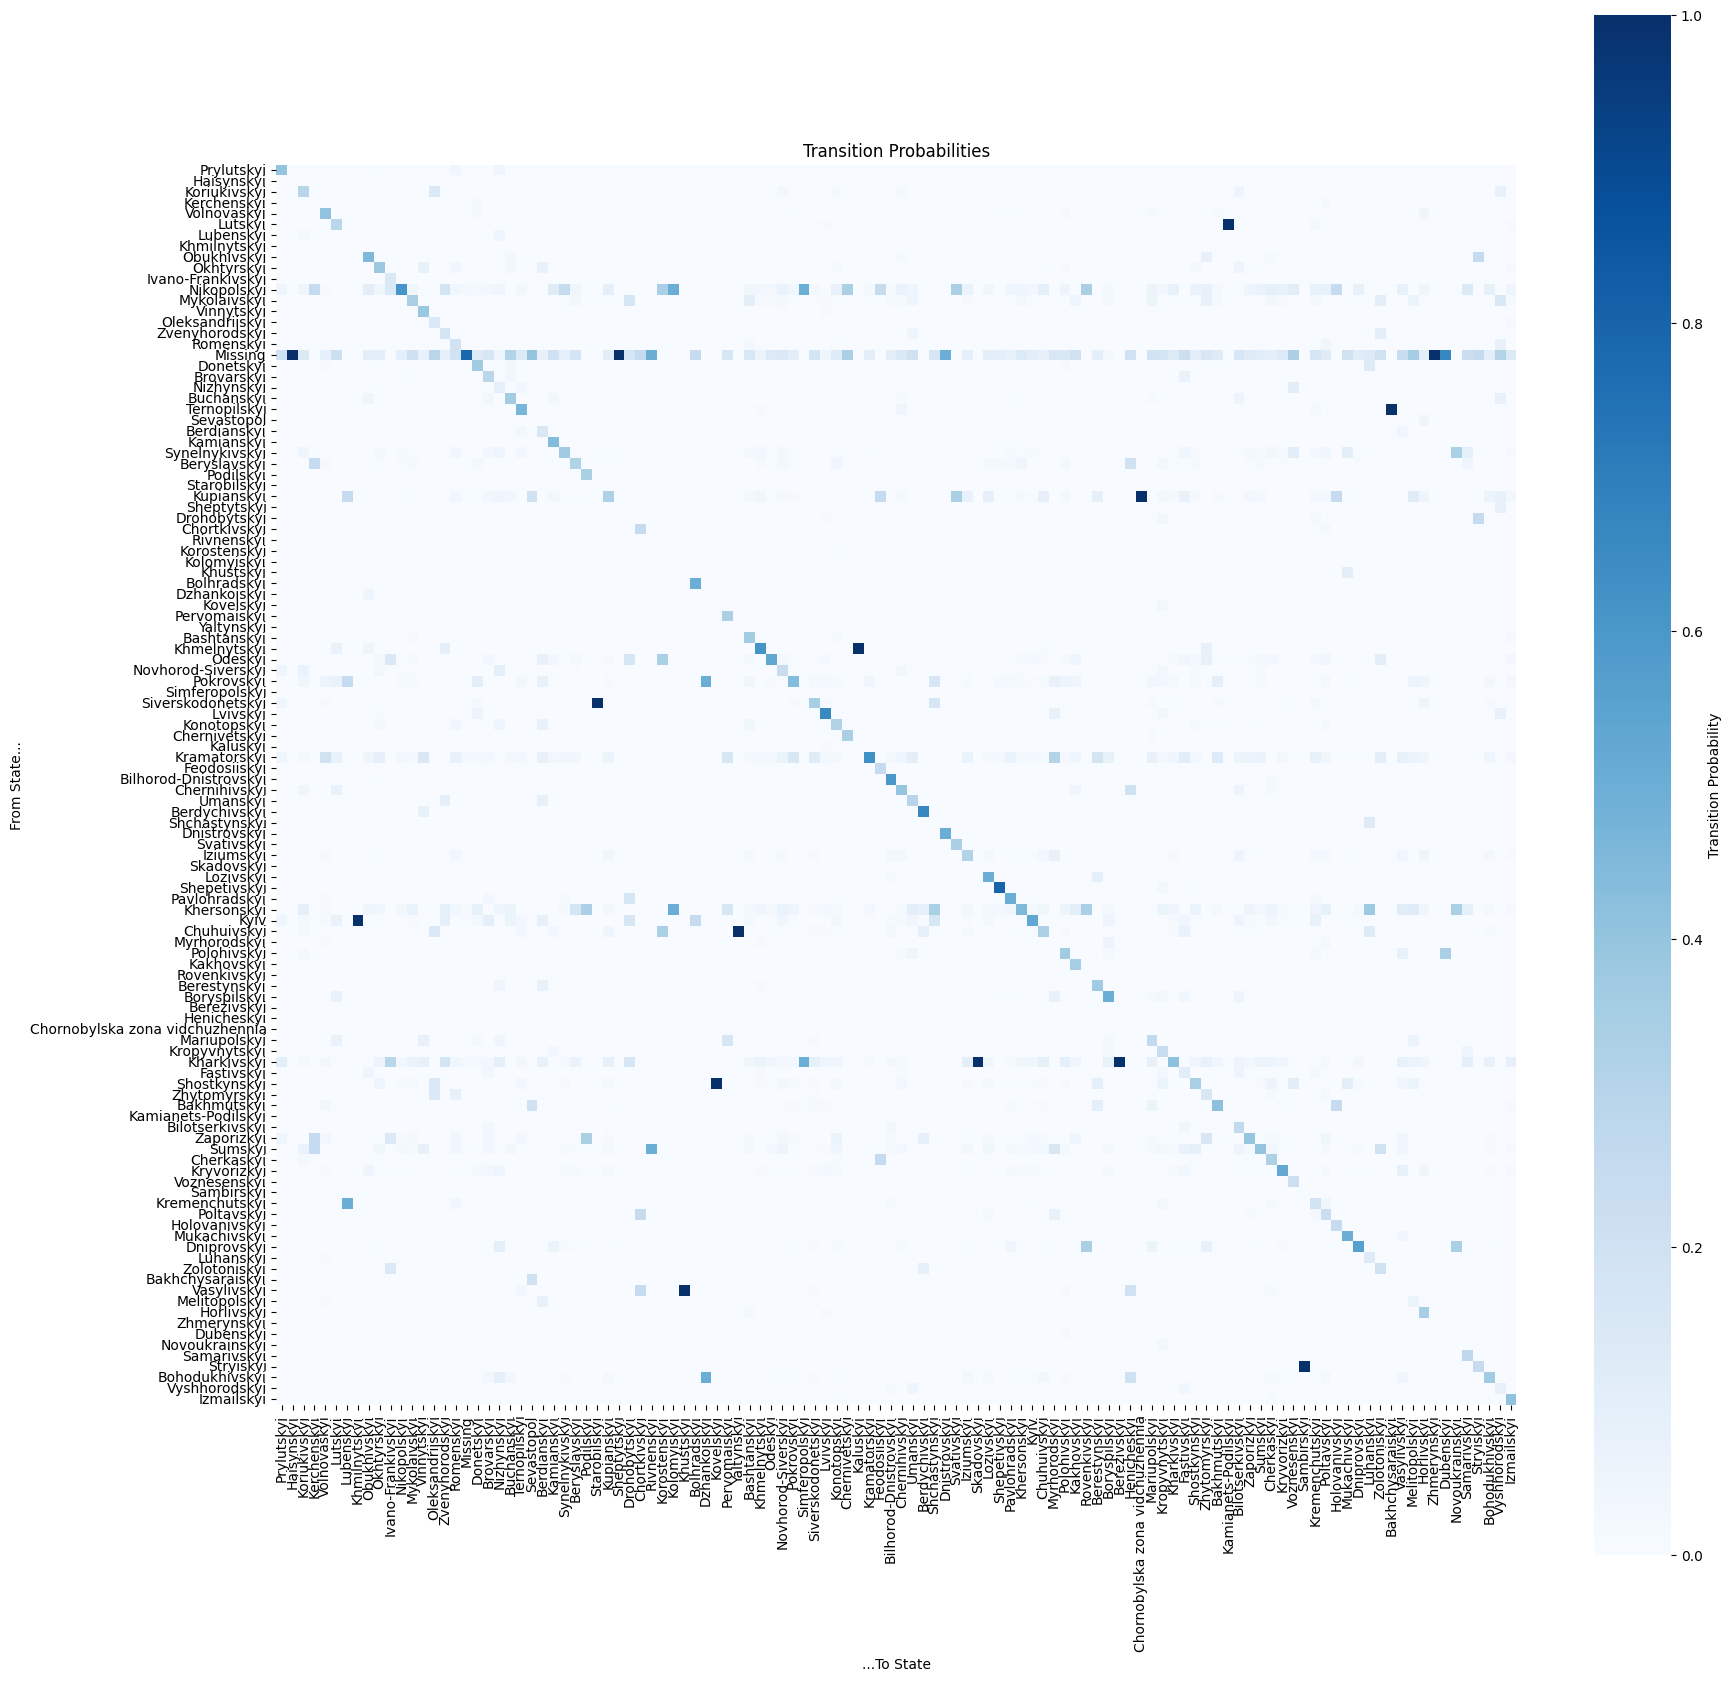

In [23]:
plt.figure(figsize=(20, 20))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=ray_states,
            yticklabels=ray_states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Infrastructure Markov Chain

What type of buildings are targeted? is there order?

In [24]:
#how mayn type_of_infrastructure are NaN?
data['type_of_infrastructure'].isna().sum()

np.int64(4)

In [52]:
#Fill NaN with 'Unknown'
data['type_of_infrastructure'] = data['type_of_infrastructure'].fillna('Unknown')
data['type_of_infrastructure'].value_counts()

type_of_infrastructure
Industrial/Business/Enterprise facilities     5056
Education facility (school, etc.)             5021
Electricity supply system                     3016
Government facilities                         2060
Gas supply system                             1968
Cultural facilities (museum, theater etc.)    1210
Health facility (hospital, health clinic)     1169
Warehouse                                      834
Agricultural facilities                        805
Other                                          724
Railway                                        556
Water supply system                            280
Religious facilities                           277
Road / Highway                                 245
Heating and water facility                     244
Fuel depot                                     203
Telecommunications                             171
Bridge                                         146
Power plant                                     74
Harbor  

In [53]:
infrastructure = data[['type_of_infrastructure']].copy()
infrastructure.reset_index(drop=True, inplace=True)
infrastructure

,type_of_infrastructure
0,Warehouse
1,Warehouse
2,Warehouse
3,Aircraft repair plant
4,Bridge
...,...
24264,"Health facility (hospital, health clinic)"
24265,Industrial/Business/Enterprise facilities
24266,Industrial/Business/Enterprise facilities
24267,Government facilities


In [54]:
#get unique rayons for the States space
infra_states = set(infrastructure.iloc[0])
for i in range(1, len(infrastructure)):
    transition_i = set(infrastructure.iloc[i])
    infra_states = infra_states.union(transition_i)
infra_states = list(infra_states)
infra_states

['Industrial/Business/Enterprise facilities',
 'Chemical storage unit',
 'Religious facilities',
 'Railway',
 'Aircraft repair plant',
 'Airport',
 'Electricity supply system',
 'Agricultural facilities',
 'Cultural facilities (museum, theater etc.)',
 'Unknown',
 'Government facilities',
 'Water supply system',
 'Oil depot',
 'Bridge',
 'Education facility (school, etc.)',
 'Heating and water facility',
 'Road / Highway',
 'Warehouse',
 'Health facility (hospital, health clinic)',
 'Other',
 'Nuclear unit',
 'Telecommunications',
 'Fuel depot',
 'Harbor',
 'Gas supply system',
 'Power plant']

In [55]:
#Now we need to modify the rayon df so the next rayon is in a new column "next_state"
infrastructure['Current_State'] = infrastructure['type_of_infrastructure']
infrastructure['Next_State'] = infrastructure['type_of_infrastructure'].shift(-1)
infrastructure_transition = infrastructure.dropna(subset=['Next_State'])
infrastructure_transition

,type_of_infrastructure,Current_State,Next_State
0,Warehouse,Warehouse,Warehouse
1,Warehouse,Warehouse,Warehouse
2,Warehouse,Warehouse,Aircraft repair plant
3,Aircraft repair plant,Aircraft repair plant,Bridge
4,Bridge,Bridge,Bridge
...,...,...,...
24263,"Cultural facilities (museum, theater etc.)","Cultural facilities (museum, theater etc.)","Health facility (hospital, health clinic)"
24264,"Health facility (hospital, health clinic)","Health facility (hospital, health clinic)",Industrial/Business/Enterprise facilities
24265,Industrial/Business/Enterprise facilities,Industrial/Business/Enterprise facilities,Industrial/Business/Enterprise facilities
24266,Industrial/Business/Enterprise facilities,Industrial/Business/Enterprise facilities,Government facilities


In [56]:
#Setting up the transition matrix
#S is the number of states
#tr_counts is the transition count matrix filled with zeros
S = len(infra_states)
tr_counts = np.zeros( (S, S) )

In [57]:
#Fill the transition count matrix
for i in range(len(infrastructure_transition)):
    current_state = infrastructure_transition.iloc[i]['Current_State']
    next_state = infrastructure_transition.iloc[i]['Next_State']
    
    current_index = infra_states.index(current_state)
    next_index = infra_states.index(next_state)
    
    tr_counts[current_index, next_index] += 1
print("Transition Counts Matrix:\n", tr_counts)

Transition Counts Matrix:
 [[2.103e+03 2.000e+00 4.600e+01 7.500e+01 1.000e+00 7.000e+00 4.710e+02
  1.770e+02 1.590e+02 0.000e+00 4.390e+02 3.100e+01 1.100e+01 2.300e+01
  5.250e+02 3.300e+01 6.400e+01 1.940e+02 2.370e+02 1.170e+02 0.000e+00
  3.500e+01 5.800e+01 7.000e+00 2.270e+02 1.300e+01]
 [3.000e+00 3.100e+01 0.000e+00 0.000e+00 1.000e+00 0.000e+00 3.000e+00
  2.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00 0.000e+00 0.000e+00 1.000e+00 2.000e+00 2.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 2.000e+00 1.000e+00]
 [6.500e+01 0.000e+00 5.100e+01 2.000e+00 0.000e+00 0.000e+00 2.500e+01
  6.000e+00 1.500e+01 0.000e+00 2.300e+01 4.000e+00 0.000e+00 0.000e+00
  3.800e+01 1.000e+00 2.000e+00 7.000e+00 9.000e+00 9.000e+00 0.000e+00
  0.000e+00 4.000e+00 0.000e+00 1.400e+01 2.000e+00]
 [7.700e+01 0.000e+00 4.000e+00 2.810e+02 0.000e+00 0.000e+00 4.400e+01
  4.000e+00 9.000e+00 0.000e+00 3.400e+01 1.000e+00 0.000e+00 1.000e+00
  3.500e+01 1.000e+00 

In [58]:
#Now we need to normalize the transition counts to get probabilities
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(sums)

State proportions: 

[[5.056e+03 5.300e+01 2.770e+02 5.560e+02 3.000e+00 2.500e+01 3.016e+03
  8.050e+02 1.210e+03 4.000e+00 2.060e+03 2.800e+02 5.100e+01 1.460e+02
  5.021e+03 2.440e+02 2.450e+02 8.330e+02 1.169e+03 7.240e+02 7.000e+00
  1.710e+02 2.030e+02 6.700e+01 1.968e+03 7.400e+01]]


In [59]:
#Continue to normalize by dividing each element by the sum of its column make sure we dont divide by zero
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=infra_states, columns=infra_states)
print(tr_df)

Transition Proportions:

                                            Industrial/Business/Enterprise facilities  \
Industrial/Business/Enterprise facilities                                        0.42   
Chemical storage unit                                                            0.00   
Religious facilities                                                             0.01   
Railway                                                                          0.02   
Aircraft repair plant                                                            0.00   
Airport                                                                          0.00   
Electricity supply system                                                        0.08   
Agricultural facilities                                                          0.03   
Cultural facilities (museum, theater etc.)                                       0.04   
Unknown                                                                          0.00

In [60]:
infra1_tr_df = tr_df

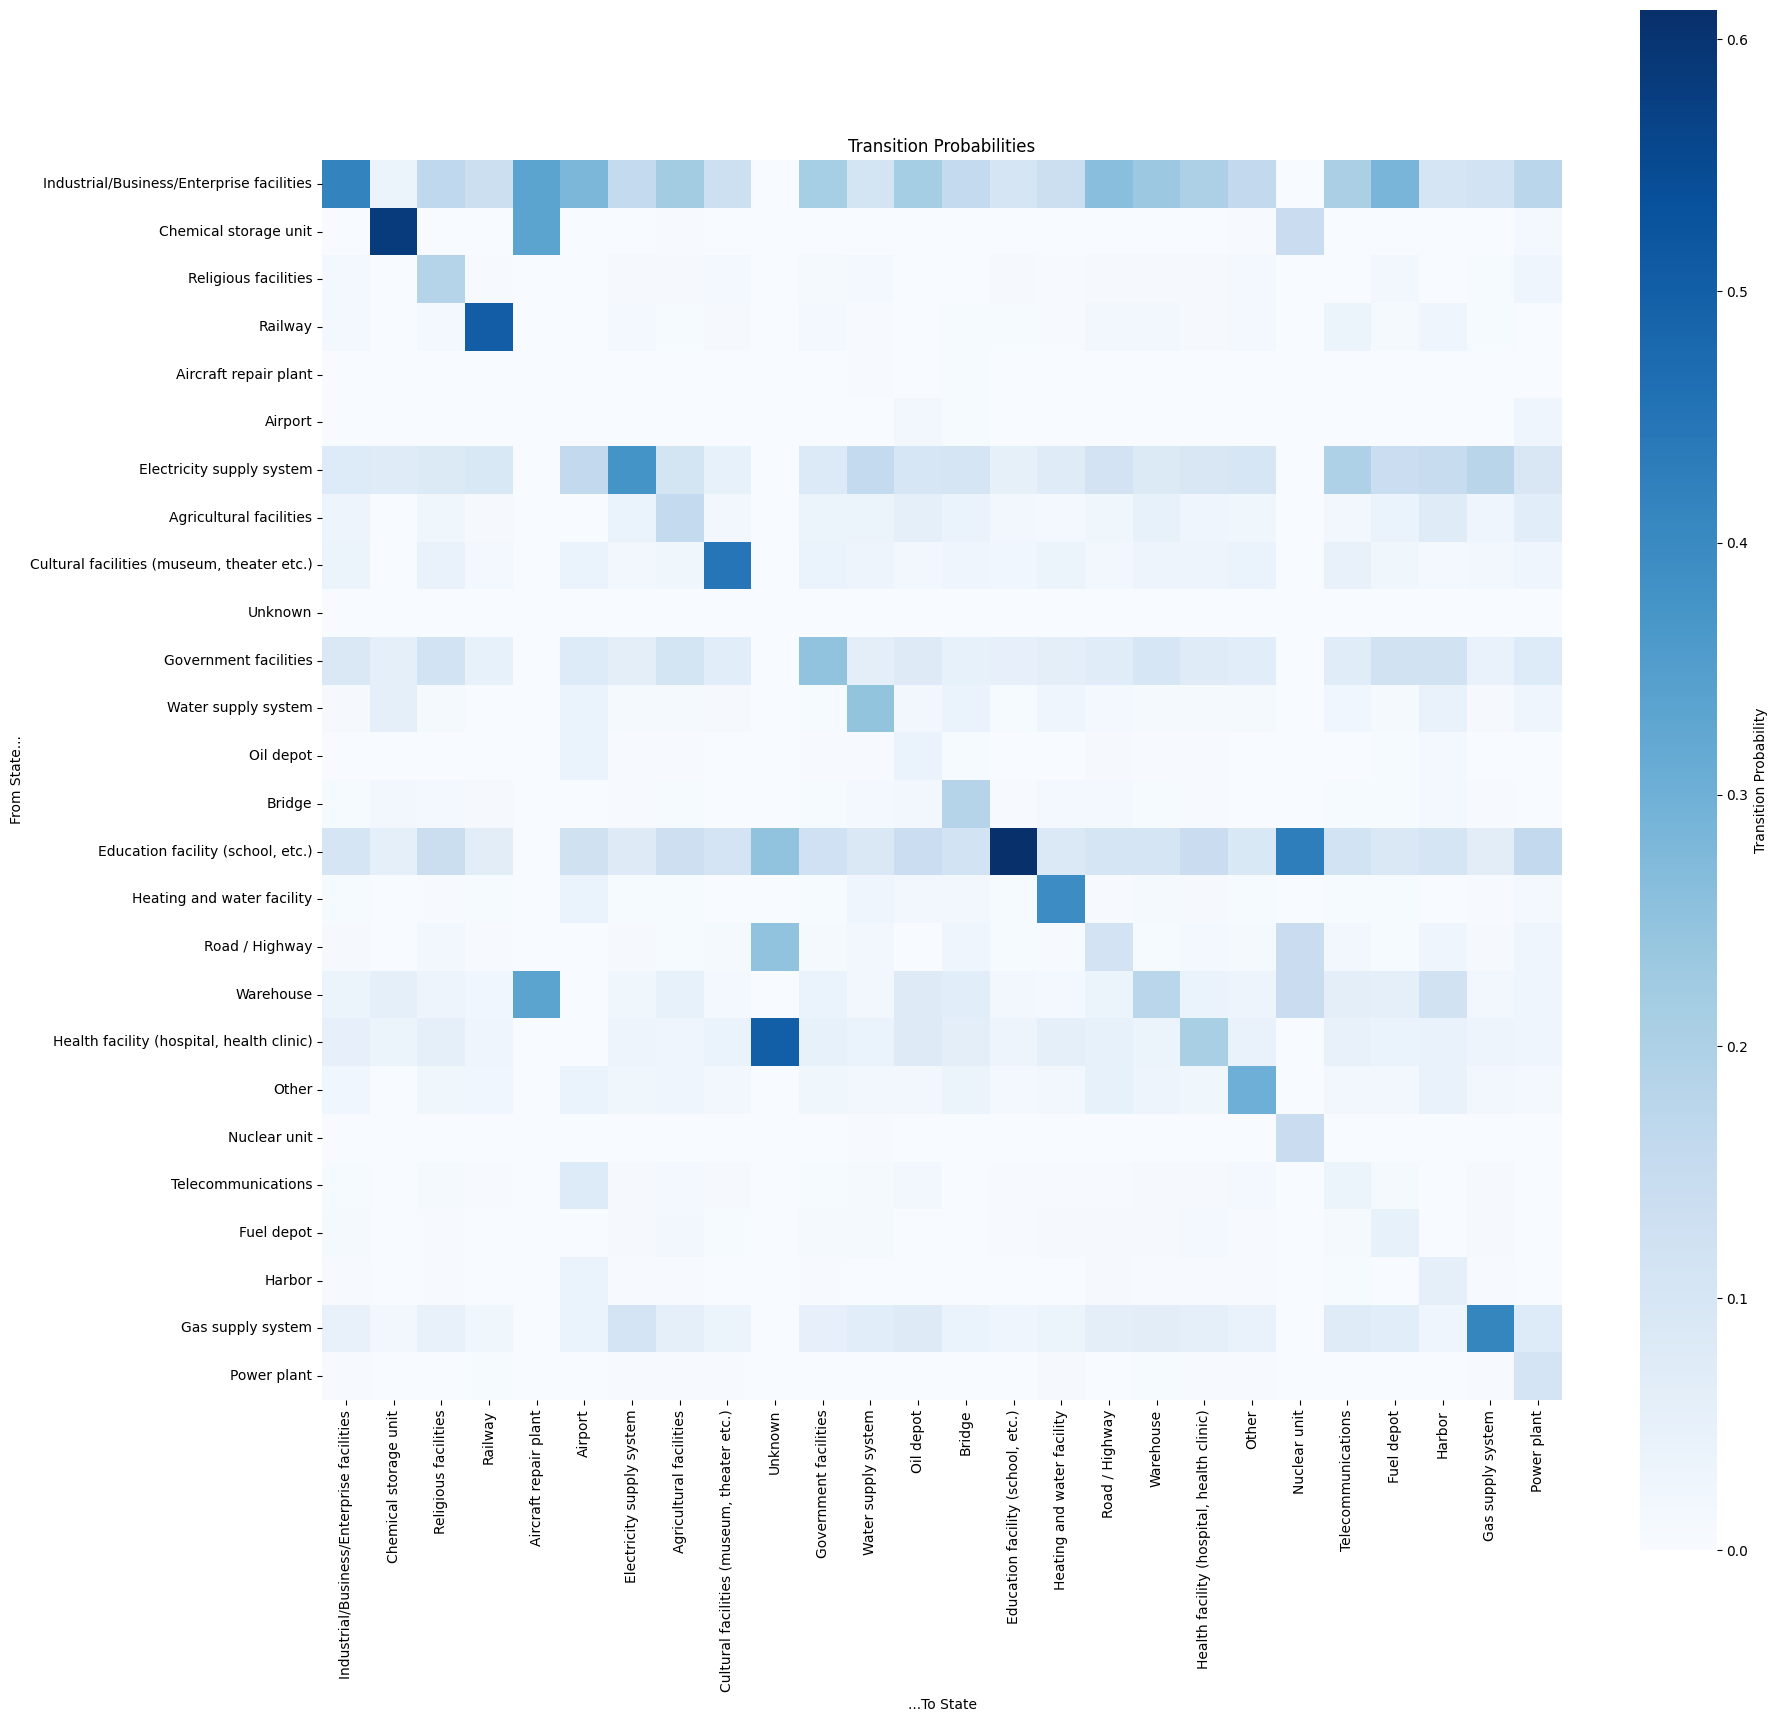

In [33]:
plt.figure(figsize=(20, 20))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=infra_states,
            yticklabels=infra_states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [68]:
# oblast projections

# transition matrix: oblast_tr_df
# oblast[0] = Luhanska

# find the index of the starting point

length_o = len(oblast_tr_df.columns)

for i in range(length_o):
    if oblast_tr_df.columns[i] == "Luhanska":
        starting_point_o = i
# initiate the projection matrix and set starting point
init_o = np.zeros(length_o) 
init_o[starting_point_o] = 1
#print(init)

time_windows = [5, 10, 25, 50, 100, 250, 500, 750, 1000, 2000]

init5_o = init_o
for i in range(5):
    init5_o = oblast_tr_df @ init5_o
#print(init2)

init10_o = init_o
for i in range(10):
   init10_o = oblast_tr_df@init10_o 

init25_o = init_o
for i in range(25):
   init25_o = oblast_tr_df@init25_o 

init50_o = init_o
for i in range(50):
   init50_o = oblast_tr_df@init50_o 

init100_o = init_o
for i in range(100):
   init100_o = oblast_tr_df@init100_o 

init250_o = init_o
for i in range(250):
   init250_o = oblast_tr_df@init250_o 

init500_o = init_o
for i in range(500):
   init500_o = oblast_tr_df@init500_o 

init750_o = init_o
for i in range(750):
   init750_o = oblast_tr_df@init750_o 

init1000_o = init_o
for i in range(1000):
   init1000_o = oblast_tr_df@init1000_o 

init2000_o = init_o
for i in range(2000):
   init2000_o = oblast_tr_df@init2000_o 

projections_o = pd.DataFrame({"initial": init_o,
                            "after 5 strikes": init5_o,
                            "after 10 strikes": init10_o,
                            "after 25 strikes": init25_o,
                            "after 50 strikes": init50_o,
                            "After 100 strikes": init100_o,
                            "After 250 strikes": init250_o,
                            "After 500 strikes": init500_o,
                            "After 750 strikes": init750_o,
                            "After 1000 strikes": init1000_o,
                            "After 2000 strikes": init2000_o})
print(projections_o)

                               initial  after 5 strikes  after 10 strikes  \
Kharkivska                         0.0         0.131961          0.123001   
Khmelnytska                        0.0         0.001860          0.002263   
Sevastopol                         0.0         0.000000          0.000000   
Volynska                           0.0         0.000118          0.000096   
Kyivska                            0.0         0.020867          0.020600   
Kyiv                               0.0         0.022631          0.022524   
Autonomous Republic of Crimea      0.0         0.000053          0.000026   
Unknown                            0.0         0.000101          0.000054   
Ivano-Frankivska                   0.0         0.000047          0.000062   
Poltavska                          0.0         0.003803          0.002330   
Cherkaska                          0.0         0.004557          0.003137   
Vinnytska                          0.0         0.000191          0.000181   

In [69]:
# rayon projections

# transition matrix: rayon_tr_df
# rayon[0] Siverskodonetskyi

length_r = len(rayon_tr_df.columns)

# find the index of the starting point
for i in range(length_r):
    if rayon_tr_df.columns[i] == "Siverskodonetskyi":
        starting_point_r = i
# initiate the projection matrix and set starting point
init_r = np.zeros(length_r)
init_r[starting_point_r] = 1
#print(init)

time_windows = [5, 10, 25, 50, 100, 250, 500, 750, 1000, 2000]

init5_r = init_r
for i in range(5):
    init5_r = rayon_tr_df @ init5_r
#print(init2)

init10_r = init_r
for i in range(10):
   init10_r = rayon_tr_df@init10_r 

init25_r = init_r
for i in range(25):
   init25_r = rayon_tr_df@init25_r 

init50_r = init_r
for i in range(50):
   init50_r = rayon_tr_df@init50_r 

init100_r = init_r
for i in range(100):
   init100_r = rayon_tr_df@init100_r 

init250_r = init_r
for i in range(250):
   init250_r = rayon_tr_df@init250_r 

init500_r = init_r
for i in range(500):
   init500_r = rayon_tr_df@init500_r 

init750_r = init_r
for i in range(750):
   init750_r = rayon_tr_df@init750_r 

init1000_r = init_r
for i in range(1000):
   init1000_r = rayon_tr_df@init1000_r 

init2000_r = init_r
for i in range(2000):
   init2000_r = rayon_tr_df@init2000_r 

projections_r = pd.DataFrame({"initial": init_r,
                            "after 5 strikes": init5_r,
                            "after 10 strikes": init10_r,
                            "after 25 strikes": init25_r,
                            "after 50 strikes": init50_r,
                            "After 100 strikes": init100_r,
                            "After 250 strikes": init250_r,
                            "After 500 strikes": init500_r,
                            "After 750 strikes": init750_r,
                            "After 1000 strikes": init1000_r,
                            "After 2000 strikes": init2000_r})
print(projections_r)

                initial  after 5 strikes  after 10 strikes  after 25 strikes  \
Prylutskyi          0.0         0.000033          0.000039          0.000022   
Haisynskyi          0.0         0.000000          0.000000          0.000000   
Koriukivskyi        0.0         0.000161          0.000155          0.000086   
Kerchenskyi         0.0         0.000030          0.000021          0.000011   
Volnovaskyi         0.0         0.001417          0.000957          0.000510   
...                 ...              ...               ...               ...   
Samarivskyi         0.0         0.000227          0.000198          0.000111   
Stryiskyi           0.0         0.000000          0.000000          0.000000   
Bohodukhivskyi      0.0         0.013028          0.011583          0.006581   
Vyshhorodskyi       0.0         0.000026          0.000021          0.000012   
Izmailskyi          0.0         0.000220          0.000213          0.000120   

                after 50 strikes  After

In [70]:
# infrastructure projections

# transition matrix: infra1_tr_df
# infra1: Warehouse

length_i1 = len(infra1_tr_df.columns)

# find the index of the starting point
for i in range(length_i1):
    if infra1_tr_df.columns[i] == "Warehouse":
        starting_point_i1 = i
# initiate the projection matrix and set starting point
init_i1 = np.zeros(length_i1)
init_i1[starting_point_i1] = 1
#print(init)

time_windows = [5, 10, 25, 50, 100, 250, 500, 750, 1000, 2000]

init5_i1 = init_i1
for i in range(5):
    init5_i1 = infra1_tr_df @ init5_i1
#print(init2)

init10_i1 = init_i1
for i in range(10):
   init10_i1 = infra1_tr_df@init10_i1 

init25_i1 = init_i1
for i in range(25):
   init25_i1 = infra1_tr_df@init25_i1 

init50_i1 = init_i1
for i in range(50):
   init50_i1 = infra1_tr_df@init50_i1 

init100_i1 = init_i1
for i in range(100):
   init100_i1 = infra1_tr_df@init100_i1 

init250_i1 = init_i1
for i in range(250):
   init250_i1 = infra1_tr_df@init250_i1 

init500_i1 = init_i1
for i in range(500):
   init500_i1 = infra1_tr_df@init500_i1 

init750_i1 = init_i1
for i in range(750):
   init750_i1 = infra1_tr_df@init750_i1 

init1000_i1 = init_i1
for i in range(1000):
   init1000_i1 = infra1_tr_df@init1000_i1 

init2000_i1 = init_i1
for i in range(2000):
   init2000_i1 = infra1_tr_df@init2000_i1 

projections_i1 = pd.DataFrame({"initial": init_i1,
                            "after 5 strikes": init5_i1,
                            "after 10 strikes": init10_i1,
                            "after 25 strikes": init25_i1,
                            "after 50 strikes": init50_i1,
                            "After 100 strikes": init100_i1,
                            "After 250 strikes": init250_i1,
                            "After 500 strikes": init500_i1,
                            "After 750 strikes": init750_i1,
                            "After 1000 strikes": init1000_i1,
                            "After 2000 strikes": init2000_i1})
print(projections_i1)

                                            initial  after 5 strikes  \
Industrial/Business/Enterprise facilities       0.0         0.206072   
Chemical storage unit                           0.0         0.000053   
Religious facilities                            0.0         0.011286   
Railway                                         0.0         0.026366   
Aircraft repair plant                           0.0         0.000054   
Airport                                         0.0         0.000071   
Electricity supply system                       0.0         0.121391   
Agricultural facilities                         0.0         0.033024   
Cultural facilities (museum, theater etc.)      0.0         0.048634   
Unknown                                         0.0         0.000000   
Government facilities                           0.0         0.083251   
Water supply system                             0.0         0.010794   
Oil depot                                       0.0         0.00

In [10]:
"""
CATEGORICAL RECODING FOR INFRASTRUCTURE

Business
  Industrial/Business/Enterprise facilities
  Warehouse

Civillian
  Education facility (school, etc.)
  Cultural facilities (museum, theater etc.)
  Health facility (hospital, health clinic)
  Religious facilities
  Telecommunications

Power & Fuel
  Oil depot
  Chemical storage unit 
  Fuel depot
  Gas supply system
  Electricity supply system
  Nuclear unit

Resources
  Agricultural facilities
  Water supply system
  Heating and water facility 

Transportation
  Aircraft repair plant
  Airport
  Harbor
  Bridge
  Railway
  Road / Highway

Other

"""
infra_mapping = {
    # old_name: new_name
    "Industrial/Business/Enterprise facilities":    "Business",
    "Warehouse":                                    "Business",

    "Education facility (school, etc.)":            "Civillian",
    "Cultural facilities (museum, theater etc.)":   "Civillian",
    "Health facility (hospital, health clinic)":    "Civillian",
    "Religious facilities":                         "Civillian",
    "Telecommunications":                           "Civillian",

    "Oil depot":                    "Power & Fuel",
    "Chemical storage unit":        "Power & Fuel",
    "Fuel depot":                   "Power & Fuel",
    "Gas supply system":            "Power & Fuel",
    "Electricity supply system":    "Power & Fuel",
    "Nuclear unit":                 "Power & Fuel",

    "Agricultural facilities":      "Resources",
    "Water supply system":          "Resources",
    "Heating and water facility":   "Resources",

    "Aircraft repair plant":    "Transportation",
    "Airport":                  "Transportation",
    "Harbor":                   "Transportation",
    "Bridge":                   "Transportation",
    "Railway":                  "Transportation",
    "Road / Highway":           "Transportation",

    "Other": "Other",

    "Unknown":  "Unknown"
}

# create a copy of dataframe, isolate the column
# then use .map()

data['type_of_infrastructure'] = data['type_of_infrastructure'].fillna('Unknown')
infrastructure = data[['type_of_infrastructure']].copy()
infrastructure.reset_index(drop=True, inplace=True)
infrastructure['type_of_infrastructure'] = infrastructure['type_of_infrastructure'].map(infra_mapping)

infrastructure["type_of_infrastructure"].value_counts()

type_of_infrastructure
Civillian         7848
Business          5890
Power & Fuel      5298
Resources         1329
Transportation    1042
Other              724
Unknown              4
Name: count, dtype: int64

In [14]:
# RE-DO THE INFRASTRUCTURE TRANSITION MATRIX

states_i2 = list(infrastructure["type_of_infrastructure"].unique())
#states_i2

# step 2: compute transition counts/matrix >> adapting code from bach.py
# REMEMBER, it's a normalized matrix

S_i2 = len(states_i2)
#T = len(bach)
tr_counts_i2 = np.zeros( (S_i2, S_i2) )



## Compute transition counts:
for row in range(1,len(infrastructure["type_of_infrastructure"])): # check two lines down for why we start at 1

    # Current and next tokens:
    x_tm1 = infrastructure["type_of_infrastructure"][row-1] # previous state >> this is why we start at 1! bc we are collecting previous state.
    x_t = infrastructure["type_of_infrastructure"][row] # current state
    # Determine transition indices:
    index_from = states_i2.index(x_tm1)
    index_to = states_i2.index(x_t)
    # Update transition counts:
    tr_counts_i2[index_to, index_from] += 1

print('Transition Counts:\n', tr_counts_i2)

# Sum the transition counts by row >> numpy axis 0 is technically rows, but visually it's columns. "rows" is what we want
sums_i2 = tr_counts_i2.sum(axis=0, keepdims=True)
#print('State proportions: \n')

# Normalize the transition count matrix to get proportions:
tr_pr_i2 = np.divide(tr_counts_i2, sums_i2, 
                             out=np.zeros_like(tr_counts_i2), 
                             where=sums_i2!=0)

#print('Transition Proportions:\n')

infra2_tr_df = pd.DataFrame(np.round(tr_pr_i2,2), index=states_i2, columns=states_i2)
print(infra2_tr_df)

Transition Counts:
 [[2.619e+03 2.030e+02 8.410e+02 1.234e+03 5.510e+02 3.000e+02 1.410e+02
  0.000e+00]
 [2.180e+02 3.710e+02 1.560e+02 1.560e+02 6.400e+01 4.400e+01 3.300e+01
  0.000e+00]
 [8.990e+02 1.450e+02 2.786e+03 7.580e+02 3.260e+02 2.680e+02 1.140e+02
  2.000e+00]
 [1.186e+03 1.830e+02 8.340e+02 4.776e+03 4.870e+02 2.490e+02 1.320e+02
  1.000e+00]
 [5.370e+02 8.300e+01 3.220e+02 5.040e+02 5.290e+02 1.050e+02 5.300e+01
  1.000e+00]
 [2.890e+02 3.200e+01 2.490e+02 2.680e+02 1.260e+02 3.320e+02 3.300e+01
  0.000e+00]
 [1.410e+02 2.400e+01 1.100e+02 1.490e+02 5.100e+01 3.100e+01 2.180e+02
  0.000e+00]
 [0.000e+00 1.000e+00 0.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00]]
                Business  Transportation  Power & Fuel  Civillian   NaN  \
Business            0.44            0.19          0.16       0.16  0.26   
Transportation      0.04            0.36          0.03       0.02  0.03   
Power & Fuel        0.15            0.14          0.53       0.10  0.15   

In [16]:
# infrastructure recoded projections

# transition matrix: infra2_tr_df
# infra1: Warehouse >> infra2: __________

length_i2 = len(infra2_tr_df.columns)

# find the index of the starting point
for i in range(length_i2):
    if infra2_tr_df.columns[i] == "Business": 
        starting_point_i2 = i
# initiate the projection matrix and set starting point
init_i2 = np.zeros(length_i2)
init_i2[starting_point_i2] = 1
#print(init)

time_windows = [5, 10, 25, 50, 100, 250, 500, 750, 1000, 2000]

init5_i2 = init_i2
for i in range(5):
    init5_i2 = infra2_tr_df @ init5_i2
#print(init2)

init10_i2 = init_i2
for i in range(10):
   init10_i2 = infra2_tr_df@init10_i2 

init25_i2 = init_i2
for i in range(25):
   init25_i2 = infra2_tr_df@init25_i2 

init50_i2 = init_i2
for i in range(50):
   init50_i2 = infra2_tr_df@init50_i2 

init100_i2 = init_i2
for i in range(100):
   init100_i2 = infra2_tr_df@init100_i2 

init250_i2 = init_i2
for i in range(250):
   init250_i2 = infra2_tr_df@init250_i2 

init500_i2 = init_i2
for i in range(500):
   init500_i2 = infra2_tr_df@init500_i2 

init750_i2 = init_i2
for i in range(750):
   init750_i2 = infra2_tr_df@init750_i2 

init1000_i2 = init_i2
for i in range(1000):
   init1000_i2 = infra2_tr_df@init1000_i2 

init2000_i2 = init_i2
for i in range(2000):
   init2000_i2 = infra2_tr_df@init2000_i2 

projections_i2 = pd.DataFrame({"initial": init_i2,
                            "after 5 strikes": init5_i2,
                            "after 10 strikes": init10_i2,
                            "after 25 strikes": init25_i2,
                            "after 50 strikes": init50_i2,
                            "After 100 strikes": init100_i2,
                            "After 250 strikes": init250_i2,
                            "After 500 strikes": init500_i2,
                            "After 750 strikes": init750_i2,
                            "After 1000 strikes": init1000_i2,
                            "After 2000 strikes": init2000_i2})
print(projections_i2)

                initial  after 5 strikes  after 10 strikes  after 25 strikes  \
Business            1.0         0.240631          0.238705          0.237890   
Transportation      0.0         0.044151          0.043693          0.043540   
Power & Fuel        0.0         0.216754          0.216464          0.215712   
Civillian           0.0         0.317680          0.320043          0.318996   
NaN                 0.0         0.085021          0.084512          0.084224   
Resources           0.0         0.053819          0.053497          0.053313   
Other               0.0         0.027341          0.027349          0.027257   
Unknown             0.0         0.000000          0.000000          0.000000   

                after 50 strikes  After 100 strikes  After 250 strikes  \
Business                0.236549           0.233890           0.226090   
Transportation          0.043295           0.042808           0.041380   
Power & Fuel            0.214496           0.212084      